In [1]:
#importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

#importing warnings to suppress wherever required
import warnings
warnings.filterwarnings("ignore")

In [18]:
#Accesing the data from file folder
r=pd.read_csv("D:/Fliprobo/Time Series/Time Series Company/Company Stock and Investment.csv")
stock=pd.DataFrame(r)
stock.head()

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
0,31-12-2009,0.025417,0.000150,0.017354,0.006848
1,04-01-2010,0.026830,0.001097,0.015565,-0.004609
2,05-01-2010,0.002699,0.001560,0.001729,0.005900
3,06-01-2010,0.021688,0.006009,-0.015906,-0.018116
4,07-01-2010,-0.006256,0.000221,-0.001849,-0.017013


In [19]:
stock.dtypes

Date                        object
Oil Investments            float64
Gold Investments           float64
Comp Stock                 float64
Other sharesInvestments    float64
dtype: object

In [20]:
#converting the date datatype
stock['Date']=pd.to_datetime(stock['Date'],format='%d-%m-%Y')
stock

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
0,2009-12-31,0.025417,0.000150,0.017354,0.006848
1,2010-01-04,0.026830,0.001097,0.015565,-0.004609
2,2010-01-05,0.002699,0.001560,0.001729,0.005900
3,2010-01-06,0.021688,0.006009,-0.015906,-0.018116
4,2010-01-07,-0.006256,0.000221,-0.001849,-0.017013
...,...,...,...,...,...
1979,2017-11-09,0.005984,0.000623,-0.002043,-0.003310
1980,2017-11-10,-0.007173,-0.000389,-0.006880,-0.003348
1981,2017-11-13,0.000352,-0.004944,-0.004008,0.003395
1982,2017-11-14,-0.019376,-0.002621,-0.015118,0.006793


In [21]:
#dropping the other features
stock.drop(['Oil Investments','Gold Investments','Comp Stock'],axis=1,inplace=True)

#setting date as my index column
stock.set_index('Date',inplace=True)

In [22]:
stock.head()

,Other sharesInvestments
Date,
2009-12-31,0.006848
2010-01-04,-0.004609
2010-01-05,0.005900
2010-01-06,-0.018116
2010-01-07,-0.017013


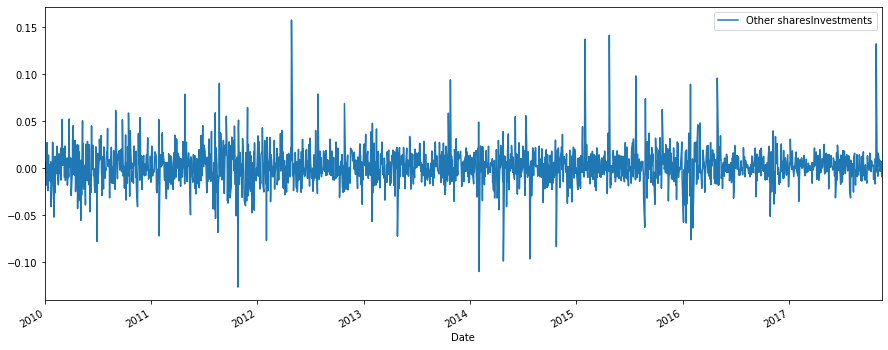

In [23]:
stock.plot(figsize = (15, 6))

In [24]:
#importing adfuller for check the data stationarity
from statsmodels.tsa.stattools import adfuller

def adfuller_test(data):
    result=adfuller(data) # same as above ,variable name changed
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary")
    else:
        print("weak evidence against null hypothesis, time series is non-stationary ") 

In [25]:
adfuller_test(stock['Other sharesInvestments'])

ADF Test Statistic : -44.848144564043906
p-value : 0.0
#Lags Used : 0
Number of Observations Used : 1983
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary


In [27]:
# average the daily sales value for each month 
y = stock['Other sharesInvestments'].resample('MS').mean()
y['2011':]

Date
2011-01-01   -0.002678
2011-02-01    0.001243
2011-03-01    0.001818
2011-04-01    0.004388
2011-05-01    0.000351
                ...   
2017-07-01    0.001102
2017-08-01   -0.000263
2017-09-01   -0.000943
2017-10-01    0.006737
2017-11-01    0.001773
Freq: MS, Name: Other sharesInvestments, Length: 83, dtype: float64

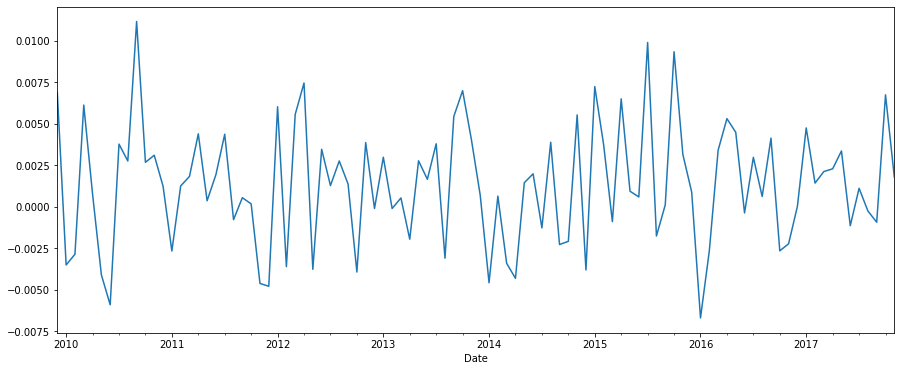

In [28]:
y.plot(figsize = (15, 6))
plt.show()

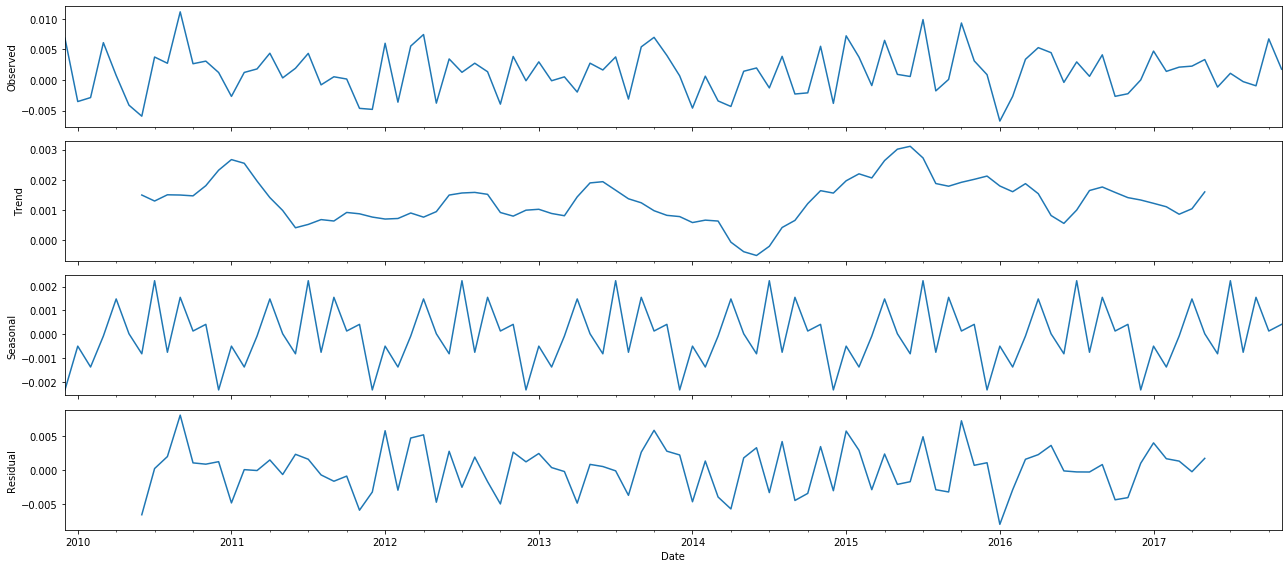

In [29]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(y, model = 'additive')
fig = decomposition.plot()
plt.show()

In [30]:
#take all possible combination for p, d and q
import itertools

# set the typical ranges for p, d, q
p = d = q = range(0, 2)

pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [31]:
# Using Grid Search find the optimal set of parameters that yields the best performance
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order = param, seasonal_order = param_seasonal, enforce_stationary = False,enforce_invertibility=False) 
            result = mod.fit()   
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, result.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:-790.9419182732419
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:-789.623061735757
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:-627.0721369944487
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:-671.875562761482
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:-789.8528926410359
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:-787.0552049240343
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:-660.4493510958866
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:-667.8241062892557
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:-789.3158564603725
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:-782.286314195044
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:-625.3133946256347
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:-670.0739560330524
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:-788.4475839907907
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:-785.4745748206835
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:-658.6652700906301
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:-666.0777820568209
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:-723.7291520382258
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:-725.141805660

In [32]:
#Fitting the ARIMA model using above optimal combination of p, d, q (optimal means combination at which we got lowest AIC score)

model = sm.tsa.statespace.SARIMAX(y, order = (1, 1, 1),seasonal_order = (1, 0, 0, 12))
result = model.fit()
print(result.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2603      0.144     -1.802      0.072      -0.543       0.023
ma.L1         -0.7123      0.121     -5.912      0.000      -0.949      -0.476
ar.S.L12      -0.2561      0.126     -2.039      0.041      -0.502      -0.010
sigma2      1.569e-05   2.89e-06      5.436      0.000       1e-05    2.13e-05


In [33]:
#getting prediction according to the results
prediction = result.get_prediction(start = pd.to_datetime('2017-01-01'), dynamic = False)
prediction_ci = prediction.conf_int()
prediction_ci

,lower Other sharesInvestments,upper Other sharesInvestments
Date,,
2017-01-01,-0.005095,0.010430
2017-02-01,-0.006258,0.009267
2017-03-01,-0.007241,0.008285
2017-04-01,-0.007858,0.007668
2017-05-01,-0.007135,0.008391
2017-06-01,-0.005331,0.010195
2017-07-01,-0.005723,0.009802
2017-08-01,-0.006199,0.009326
2017-09-01,-0.007113,0.008413


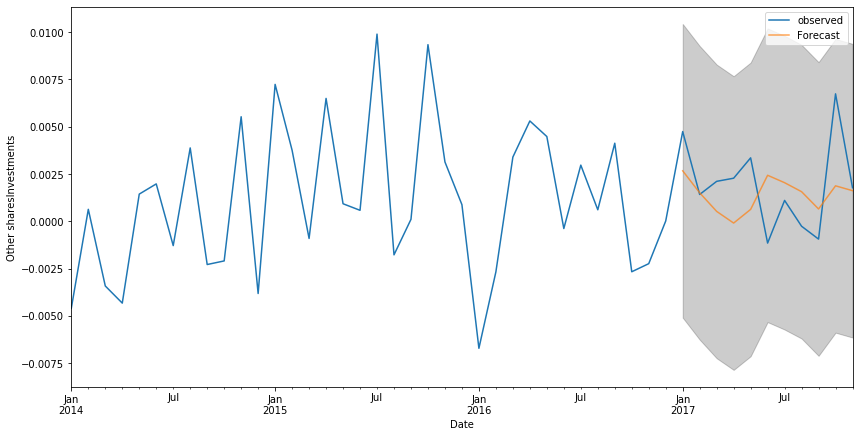

In [34]:
#Visualize the forecasting
ax = y['2014':].plot(label = 'observed')
prediction.predicted_mean.plot(ax = ax, label = 'Forecast', alpha = 0.7, figsize = (14, 7))
ax.fill_between(prediction_ci.index, prediction_ci.iloc[:, 0], prediction_ci.iloc[:, 1], color = 'k', alpha = 0.2)
ax.set_xlabel("Date")
ax.set_ylabel('Other sharesInvestments')
plt.legend()
plt.show()

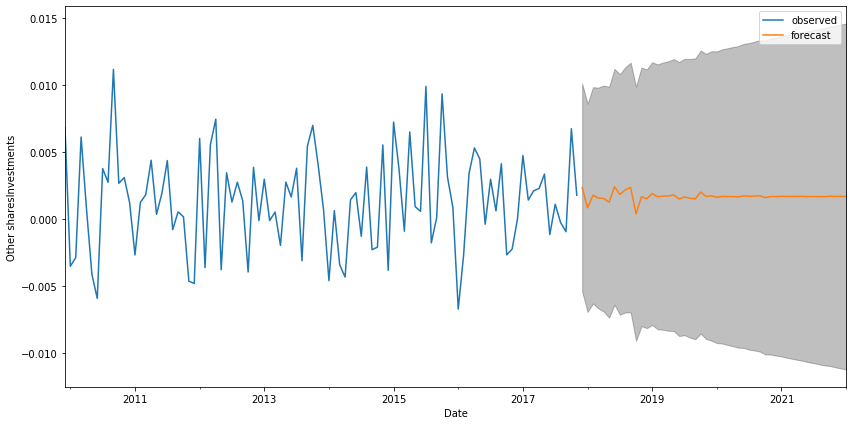

In [35]:
# forcasting for out of sample data
pred_uc = result.get_forecast(steps = 50)
pred_ci = pred_uc.conf_int()

ax = y.plot(label = 'observed', figsize = (14, 7))
pred_uc.predicted_mean.plot(ax = ax, label = 'forecast')
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color = 'k', alpha = 0.25)
ax.set_xlabel('Date')
ax.set_ylabel('Other sharesInvestments')

plt.legend()
plt.show()
